In [2]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 61.1 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible

In [3]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
data_set = "/kaggle/input/amharic-speech-emotional-dataset-ased/"
# Run one example
dir_list = os.listdir(data_set)
dir_list.remove('.gitattributes')
dir_list.remove('README.md')
dir_list

['02Fearful', '01Neutral', '03Happy', '04Sad', '05Angry']

In [25]:
# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for directory in dir_list:
#     print(directory[2:])
    dir_path = os.path.join(data_set, directory)
    sub_dir = os.listdir(dir_path)
    for dire in sub_dir:
        file_path = os.path.join(dir_path, dire)
        emotion = directory[2:]
#         print(file_path, ' ', emotion)
        # Append the emotion and file path to the data list
        data.append([emotion, file_path])            


# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [26]:
df.head(5)

,emotion,path
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset...


In [27]:
ref = df
ref.head(10)

,emotion,path
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
5,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
6,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
7,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
8,Fearful,/kaggle/input/amharic-speech-emotional-dataset...
9,Fearful,/kaggle/input/amharic-speech-emotional-dataset...


In [28]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
1779,Sad,/kaggle/input/amharic-speech-emotional-dataset-ased/04Sad/s4-04-01-02-61.wav
1692,Sad,/kaggle/input/amharic-speech-emotional-dataset-ased/04Sad/s4-02-01-02-04.wav
1409,Happy,/kaggle/input/amharic-speech-emotional-dataset-ased/03Happy/h3-04-01-02-60.wav
26,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-04-01-01-27.wav
179,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-01-01-02-44.wav
...,...,...
735,Neutral,/kaggle/input/amharic-speech-emotional-dataset-ased/01Neutral/n1-02-02-01-21.wav
2289,Angry,/kaggle/input/amharic-speech-emotional-dataset-ased/05Angry/a5-02-01-02-46.wav
94,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-04-01-02-60.wav
2332,Angry,/kaggle/input/amharic-speech-emotional-dataset-ased/05Angry/a5-04-01-02-20.wav


<Axes: ylabel='count'>

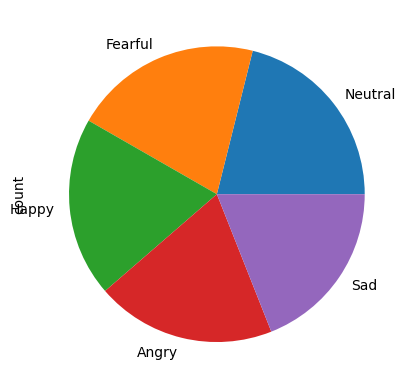

In [29]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [30]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.3 MB/s eta 0:00:0000:010:01


In [31]:
import resampy
from resampy import resample
import librosa

In [32]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

2474


,Features
0,"[-23.152196884155273, -23.451374053955078, -20.157176971435547, -20.03514862060547, -22.401214599609375, -19.953197479248047, -18.150264739990234, -17.93613624572754, -18.722675323486328, -18.333375930786133, -16.548145294189453, -16.488218307495117, -18.760746002197266, -17.656787872314453, -16.928308486938477, -15.353718757629395, -13.814058303833008, -15.244560241699219, -16.950117111206055, -16.936737060546875, -16.46514320373535, -15.894128799438477, -15.274645805358887, -16.141178131103516, -16.13753890991211, -15.978564262390137, -13.787694931030273, -13.893798828125, -14.333165168762207, -12.43208122253418, -11.805781364440918, -11.59095287322998, -12.44878101348877, -16.213077545166016, -13.908088684082031, -14.913923263549805, -15.647211074829102, -12.925883293151855, -12.903207778930664, -16.011348724365234, -15.204928398132324, -13.700762748718262, -14.078349113464355, -13.435002326965332, -13.85313892364502, -14.616981506347656, -16.67624855041504, -20.46956443786621, -19.720535278320312, -19.906862258911133, -19.514598846435547, -19.513731002807617, -20.513256072998047, -19.17661476135254, -17.697965621948242, -17.150646209716797, -16.664653778076172, -15.261411666870117, -15.639391899108887, -15.303169250488281, -15.716052055358887, -16.86997413635254, -19.423255920410156, -21.873689651489258, -22.602745056152344, -24.384904861450195, -21.2701416015625, -19.261493682861328, -17.035049438476562, -15.879704475402832, -16.510570526123047, -19.468679428100586, -19.56914520263672, -19.611858367919922, -18.209760665893555, -19.274433135986328, -20.861413955688477, -19.698923110961914, -18.902835845947266, -14.128410339355469, -12.844705581665039, -13.862584114074707, -17.797826766967773, -18.231666564941406, -20.077037811279297, -21.756376266479492, -23.316394805908203, -24.52647590637207, -23.771881103515625, -23.243188858032227, -22.684490203857422, -22.722042083740234, -22.076221466064453, -18.966655731201172, -16.65671157836914, -16.023372650146484, -18.3753662109375, -18.832714080810547, -16.48343276977539, -17.557058334350586, ...]"
1,"[-5.5284271240234375, -8.135015487670898, -12.17308521270752, -12.316258430480957, -10.669942855834961, -9.805893898010254, -9.293105125427246, -10.492574691772461, -12.162108421325684, -13.085537910461426, -15.036697387695312, -16.685611724853516, -17.666919708251953, -16.08114242553711, -14.99475383758545, -14.67326545715332, -14.816495895385742, -14.001086235046387, -12.945062637329102, -13.882730484008789, -12.690409660339355, -11.76314926147461, -12.521787643432617, -13.472940444946289, -11.310600280761719, -10.62951946258545, -9.563312530517578, -10.563465118408203, -11.127012252807617, -13.148195266723633, -14.95429515838623, -15.25097370147705, -13.675372123718262, -12.28481674194336, -12.30795955657959, -11.405787467956543, -13.517155647277832, -15.169975280761719, -15.080424308776855, -15.1441011428833, -12.210186004638672, -11.100279808044434, -11.530339241027832, -11.423982620239258, -13.505081176757812, -13.647244453430176, -13.454362869262695, -13.68632984161377, -15.428919792175293, -14.820512771606445, -15.110427856445312, -14.524826049804688, -13.011360168457031, -13.62414264678955, -14.325674057006836, -14.920994758605957, -15.297754287719727, -16.27782440185547, -14.89928913116455, -13.285600662231445, -13.765695571899414, -15.10038948059082, -12.720476150512695, -13.02338695526123, -12.037446975708008, -12.941264152526855, -12.394987106323242, -14.853228569030762, -15.945671081542969, -11.138379096984863, -9.524632453918457, -8.93262004852295, -9.347416877746582, -8.727012634277344, -9.773427963256836, -10.738438606262207, -10.313961029052734, -10.521047592163086, -10.8316650390625, -12.576436996459961, -13.824923515319824, -13.21312427520752, -12.326189994812012, -12.078554153442383, -13.838643074035645, -11.962358474731445, -10.285127639770508, -10.737581253051758, -12.109990119934082, -9.70039176940918, -8.118522644042969, -6.637698173522949, -7

In [33]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-03-02-01-58.wav,-23.152197,-23.451374,-20.157177,-20.035149,-22.401215,-19.953197,-18.150265,-17.936136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-02-01-02-12.wav,-5.528427,-8.135015,-12.173085,-12.316258,-10.669943,-9.805894,-9.293105,-10.492575,...,0.279962,0.273290,0.299366,0.345571,0.344912,0.339673,0.342653,0.372234,0.376828,0.037507
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-05-02-02-28.wav,-10.099966,-9.968691,-11.168291,-14.442621,-13.556284,-9.960783,-9.802357,-10.070429,...,0.158448,0.190320,0.221347,0.218709,0.221607,0.241663,0.255612,0.219718,0.201431,0.022437
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-02-02-10.wav,-15.834958,-13.005107,-12.805453,-12.396437,-13.474775,-12.518145,-12.857997,-11.786881,...,0.464581,0.376714,0.314873,0.275603,0.240889,0.235477,0.257928,0.247406,0.287117,0.006994
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-01-01-21.wav,-9.998976,-8.085356,-6.902777,-7.571289,-5.208065,-4.844409,-4.562238,-2.453645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(2474, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-03-02-01-58.wav,-23.152197,-23.451374,-20.157177,-20.035149,-22.401215,-19.953197,-18.150265,-17.936136,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-02-01-02-12.wav,-5.528427,-8.135015,-12.173085,-12.316258,-10.669943,-9.805894,-9.293105,-10.492575,...,0.279962,0.273290,0.299366,0.345571,0.344912,0.339673,0.342653,0.372234,0.376828,0.037507
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-05-02-02-28.wav,-10.099966,-9.968691,-11.168291,-14.442621,-13.556284,-9.960783,-9.802357,-10.070429,...,0.158448,0.190320,0.221347,0.218709,0.221607,0.241663,0.255612,0.219718,0.201431,0.022437
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-02-02-10.wav,-15.834958,-13.005107,-12.805453,-12.396437,-13.474775,-12.518145,-12.857997,-11.786881,...,0.464581,0.376714,0.314873,0.275603,0.240889,0.235477,0.257928,0.247406,0.287117,0.006994
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-01-01-21.wav,-9.998976,-8.085356,-6.902777,-7.571289,-5.208065,-4.844409,-4.562238,-2.453645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
1521,-5.743421,-8.414050,-15.652781,-17.102295,-15.507652,-15.613459,-15.616140,-15.322139,-14.811900,-17.350716,...,0.124433,0.098288,0.261021,0.438361,0.258990,0.204475,0.236026,0.489656,0.666533,0.077406
2216,-6.236002,-5.824351,-4.742111,-4.254767,-5.170714,-5.553136,-7.423666,-5.404513,-4.414114,-6.955936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1087,-6.692843,-8.039961,-10.384045,-12.350667,-11.524385,-11.924584,-11.854434,-9.459068,-8.011096,-5.140445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2156,-12.271173,-13.375760,-14.319300,-15.869371,-16.422178,-13.679308,-13.789261,-16.982803,-17.163933,-16.338907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2251,-9.964893,-12.069280,-15.755572,-15.122221,-15.671621,-14.579289,-14.999962,-16.257668,-16.186661,-15.394061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,-10.979250,-13.809799,-20.159954,-19.761543,-16.938993,-16.583416,-17.236908,-17.174206,-16.556818,-16.329908,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
158,-0.115230,-2.736012,-7.675797,-6.279242,-5.112871,-6.169726,-5.391749,-4.887576,-5.790110,-7.184752,...,0.199626,0.179501,0.170582,0.176065,0.184584,0.186901,0.189716,0.191690,0.215279,0.014058
1090,-12.511442,-14.317160,-15.106728,-15.292700,-14.452593,-13.004483,-13.327451,-14.247416,-16.449543,-16.075108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1041,-8.087600,-10.495465,-15.971777,-17.349573,-17.102383,-16.190357,-16.244442,-16.768291,-14.814880,-13.177071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2362,-13.034979,-12.517692,-11.132241,-10.374240,-11.032512,-11.307197,-11.378761,-13.632378,-14.271357,-16.487242,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
(1979, 531, 1)
(495, 531, 1)


In [38]:
lb.classes_

array(['Angry', 'Fearful', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [39]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

2474


,mel_spectrogram
0,"[-40.486935, -40.53497, -37.262596, -35.64092, -32.82139, -26.812849, -25.959171, -28.565271, -31.503115, -32.220833, -32.240204, -32.95872, -34.75712, -35.884865, -34.178066, -33.604515, -34.926975, -37.16963, -38.869244, -39.747997, -37.587822, -35.637146, -35.87302, -35.50251, -34.272243, -33.22694, -35.637527, -40.274227, -42.068615, -41.860115, -35.93408, -26.793278, -21.207743, -20.256338, -21.18908, -25.20607, -28.428818, -30.661377, -34.24342, -37.04262, -38.225327, -37.70988, -36.191772, -36.34405, -36.81471, -36.794033, -37.352566, -38.909325, -38.593323, -35.458794, -33.7743, -36.133514, -38.102566, -36.615078, -34.81846, -33.354553, -33.49375, -34.19175, -34.105434, -34.193993, -35.359283, -36.624447, -38.744953, -41.667587, -42.280537, -41.31002, -40.275204, -38.679546, -37.082294, -37.120804, -37.86775, -39.072586, -40.909977, -43.510006, -44.75058, -44.460827, -42.65365, -40.96382, -41.094025, -41.454662, -43.216915, -44.329952, -45.27355, -46.08847, -47.584816, -49.165527, -49.339348, -49.928658, -50.242794, -50.82691, -50.91438, -52.115967, -51.338154, -50.474976, -50.250736, -50.190983, -50.065987, -49.905483, -48.7699, -49.246593, ...]"
1,"[-13.79241, -14.58345, -18.539698, -19.47921, -20.092743, -19.882145, -19.426224, -20.353455, -21.231285, -22.15674, -22.114851, -24.987282, -30.308317, -27.14338, -21.748724, -21.381285, -20.988031, -19.78939, -20.815977, -21.176533, -20.57388, -22.169838, -25.032255, -27.635216, -27.545574, -25.830154, -26.799366, -27.245962, -25.184084, -23.537447, -22.061707, -21.455929, -21.632015, -23.165585, -23.201395, -23.814898, -24.222595, -24.164148, -22.517649, -22.6257, -23.095947, -21.919453, -21.267359, -22.143633, -24.146069, -26.229967, -27.194399, -27.432272, -28.080011, -27.297379, -26.007248, -24.33272, -23.816004, -24.074469, -25.355558, -27.686756, -31.008179, -30.476067, -27.7935, -25.43977, -24.230957, -24.908718, -27.106533, -30.412079, -29.013857, -28.06702, -30.884007, -32.630573, -28.83133, -24.165216, -22.073534, -23.636106, -24.753529, -26.30772, -28.464685, -28.908888, -27.887665, -26.207043, -23.900608, -22.023275, -20.778442, -19.988031, -22.089636, -27.193722, -31.057426, -33.25198, -34.77132, -33.737137, -23.785809, -18.024122, -15.971003, -14.454722, -14.386844, -14.443338, -15.701118, -14.6983595, -15.621269, -17.480474, -18.735737, -19.668343, ...]"
2,"[-23.49674, -22.699326, -22.87104, -19.29822, -16.102352, -14.182702, -14.187004, -13.165268, -9.931608, -8.05547, -6.750665, -6.3475327, -8.081906, -9.139717, -10.261403, -11.440275, -12.088232, -12.743698, -12.274072, -11.543937, -10.101232, -9.492017, -9.048144, -8.740512, -8.165547, -7.8972654, -7.522115, -8.528108, -10.014228, -11.818946, -12.735013, -12.40251, -12.560961, -13.494375, -13.986385, -14.242831, -15.641289, -15.981241, -16.062277, -14.653336, -14.228809, -14.537736, -15.771752, -17.281706, -19.733091, -22.171156, -23.467623, -24.218775, -24.81215, -24.368599, -22.83668, -21.053288, -19.90288, -19.270704, -17.900867, -16.407019, -14.055979, -11.775554, -9.2167015, -8.185916, -8.608154, -9.978704, -10.093857, -10.943034, -13.665943, -17.948713, -22.259228, -26.891422, -29.177706, -31.527416, -32.82219, -34.72769, -37.70991, -36.364136, -37.75788, -42.16276, -44.25951, -45.629738, -46.880234, -48.25897, -50.73739, -55.12919, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, -56.211563, ...]"
3,"[-39.459717, -34.382885, -34.809216, -35.169796, -36.34738, -37.186474, -38.16125, -38.62799, -39.735188, -41.795177, -43.511177, -44.27208, -44.695496, -44.19112, -42.070908, -41.45285, -41.0121, -40.16279, -38.978996, -38.968117, -38.23618, -38.89233, -39.463017, -39.758926, -40.031033, -43.4542, -43.28267, -40.480793, -40.842403, -41.218147, -40.33214, -40.96797, -41.134132, -41.130676, -42.197334, -43.501213, -44.82572, -46

In [40]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-03-02-01-58.wav,-40.486935,-40.534969,-37.262596,-35.640919,-32.821388,-26.812849,-25.959171,-28.565271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-02-01-02-12.wav,-13.792410,-14.583450,-18.539698,-19.479210,-20.092743,-19.882145,-19.426224,-20.353455,...,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-05-02-02-28.wav,-23.496740,-22.699326,-22.871040,-19.298220,-16.102352,-14.182702,-14.187004,-13.165268,...,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-02-02-10.wav,-39.459717,-34.382885,-34.809216,-35.169796,-36.347382,-37.186474,-38.161251,-38.627991,...,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-01-01-21.wav,-24.725702,-22.472605,-22.686947,-22.896002,-22.184542,-21.365770,-21.832367,-21.105438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
1521,-10.636950,-14.491588,-29.248056,-29.114691,-27.451841,-26.786848,-24.526791,-22.008114,-22.144373,-24.551846,...,-54.307507,-54.307507,-54.307507,-54.307507,-54.307507,-54.307507,-54.307507,-54.307507,-54.307507,-54.307507
2216,-19.784201,-19.400644,-20.857960,-19.686638,-16.898300,-13.751146,-13.561673,-14.438767,-16.035894,-17.375103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,-5.085292,-8.615533,-16.617506,-19.744781,-20.588310,-18.309032,-15.423903,-14.847958,-16.118137,-17.936756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,-30.737558,-29.726038,-26.157745,-28.569540,-32.566483,-31.977104,-31.716070,-32.169544,-31.290861,-31.171684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,-15.926486,-16.888592,-21.155685,-20.652925,-20.315083,-19.506542,-21.194639,-24.762062,-28.011543,-29.480217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,-31.548326,-32.419632,-34.890507,-35.860004,-35.708401,-36.561672,-38.328308,-39.346699,-40.810402,-41.473759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,-13.948822,-17.427191,-20.263372,-18.216393,-18.471310,-19.137758,-19.515079,-19.622610,-20.775673,-22.852163,...,-58.247944,-58.247944,-58.247944,-58.247944,-58.247944,-58.247944,-58.247944,-58.247944,-58.247944,-58.247944
1090,-27.798424,-30.625225,-35.260864,-36.024651,-27.616714,-21.740723,-21.505960,-22.750704,-22.939213,-23.495865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,-6.683863,-5.949220,-9.536419,-10.394409,-10.642963,-11.608943,-11.031830,-9.703784,-8.194865,-9.806298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2362,-31.013460,-27.919762,-24.498236,-20.718866,-17.303160,-14.064975,-12.669960,-15.168310,-17.114204,-18.304573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
(1979, 259, 1)
(495, 259, 1)


In [46]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-03-02-01-58.wav,-40.486935,-40.534969,-37.262596,-35.640919,-32.821388,-26.812849,-25.959171,-28.565271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-02-01-02-12.wav,-13.792410,-14.583450,-18.539698,-19.479210,-20.092743,-19.882145,-19.426224,-20.353455,...,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-05-02-02-28.wav,-23.496740,-22.699326,-22.871040,-19.298220,-16.102352,-14.182702,-14.187004,-13.165268,...,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-02-02-10.wav,-39.459717,-34.382885,-34.809216,-35.169796,-36.347382,-37.186474,-38.161251,-38.627991,...,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-01-01-21.wav,-24.725702,-22.472605,-22.686947,-22.896002,-22.184542,-21.365770,-21.832367,-21.105438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: could not convert string to float: 'Fearful'

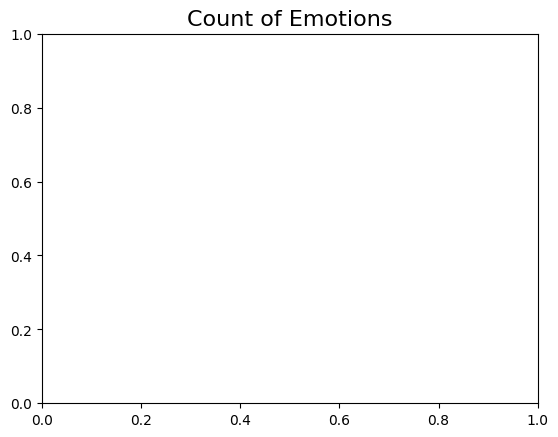

In [47]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [52]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [53]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [54]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [55]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [56]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [57]:
len(X), len(Y), data_path.path.shape

(7422, 7422, (2474,))

In [58]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.099761,0.472010,0.513587,0.575924,0.594357,0.531199,0.580276,0.682291,0.797705,0.698360,...,7.056233e-08,6.571646e-08,6.228933e-08,5.974334e-08,5.785447e-08,5.650808e-08,5.553393e-08,5.491002e-08,5.452252e-08,Fearful
1,0.295430,0.595842,0.633923,0.669436,0.706976,0.705189,0.641512,0.631325,0.744542,0.808405,...,4.372618e-04,4.531832e-04,4.640096e-04,4.256561e-04,4.538235e-04,4.552038e-04,4.389028e-04,4.517296e-04,4.778119e-04,Fearful
2,0.071602,0.427843,0.411364,0.467534,0.581176,0.597625,0.513850,0.561275,0.666750,0.806695,...,5.778567e-08,5.099787e-08,4.643325e-08,4.314105e-08,4.073331e-08,3.908545e-08,3.814685e-08,3.053524e-08,1.188486e-08,Fearful
3,0.060985,0.410455,0.383117,0.317290,0.317098,0.309158,0.312668,0.362203,0.397025,0.384518,...,3.848495e-06,3.548986e-06,3.337143e-06,3.179896e-06,3.062982e-06,2.978904e-06,2.917841e-06,2.878268e-06,2.853797e-06,Fearful
4,0.258870,0.707827,0.652406,0.640544,0.645671,0.638741,0.591339,0.629883,0.653210,0.646509,...,1.880742e-04,1.851955e-04,1.919887e-04,1.953389e-04,2.023463e-04,1.983340e-04,1.937488e-04,1.985101e-04,1.984118e-04,Fearful


In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
(5937, 155, 1)
(1485, 155, 1)


(7422, 5)

In [60]:
lb.classes_

array(['Angry', 'Fearful', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [61]:
#Accuarte class labels

In [62]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-03-02-01-58.wav,-40.486935,-40.534969,-37.262596,-35.640919,-32.821388,-26.812849,-25.959171,-28.565271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-02-01-02-12.wav,-13.792410,-14.583450,-18.539698,-19.479210,-20.092743,-19.882145,-19.426224,-20.353455,...,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722,-49.568722
2,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-05-02-02-28.wav,-23.496740,-22.699326,-22.871040,-19.298220,-16.102352,-14.182702,-14.187004,-13.165268,...,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563,-56.211563
3,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-02-02-10.wav,-39.459717,-34.382885,-34.809216,-35.169796,-36.347382,-37.186474,-38.161251,-38.627991,...,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366,-67.319366
4,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-07-01-01-21.wav,-24.725702,-22.472605,-22.686947,-22.896002,-22.184542,-21.365770,-21.832367,-21.105438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-05-01-02-59.wav,-16.006977,-20.341843,-31.622480,-30.764952,-29.495638,-27.531038,-25.652081,-24.385653,...,-56.227650,-56.227650,-56.227650,-56.227650,-56.227650,-56.227650,-56.227650,-56.227650,-56.227650,-56.227650
6,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-02-01-02-10.wav,-6.206487,-10.134968,-19.034184,-19.653566,-23.012270,-23.103983,-21.316393,-21.295311,...,-46.459995,-46.459995,-46.459995,-46.459995,-46.459995,-46.459995,-46.459995,-46.459995,-46.459995,-46.459995
7,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-03-01-02-61.wav,-16.358141,-18.256851,-23.643538,-25.328245,-26.970537,-32.034145,-36.669376,-30.319113,...,-54.898960,-54.898960,-54.898960,-54.898960,-54.898960,-54.898960,-54.898960,-54.898960,-54.898960,-54.898960
8,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-06-02-02-50.wav,-33.678947,-33.861568,-39.021381,-41.520245,-32.581253,-26.353210,-25.820288,-26.932449,...,-70.965797,-70.965797,-70.965797,-70.965797,-70.965797,-70.965797,-70.965797,-70.965797,-70.965797,-70.965797
9,Fearful,/kaggle/input/amharic-speech-emotional-dataset-ased/02Fearful/f2-04-01-01-01.wav,-28.893919,-30.441374,-32.052437,-25.465370,-23.380960,-24.563059,-26.610876,-26.813868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [63]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [64]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [65]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [66]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [67]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [68]:
len(X), len(Y), data_path.path.shape

(9896, 9896, (2474,))

In [69]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.099761,0.472010,0.513587,0.575924,0.594357,0.531199,0.580276,0.682291,0.797705,0.698360,...,7.056233e-08,6.571646e-08,6.228933e-08,5.974334e-08,5.785447e-08,5.650808e-08,5.553393e-08,5.491002e-08,5.452252e-08,Fearful
1,0.221502,0.562617,0.597489,0.649582,0.661257,0.589474,0.582295,0.686361,0.803372,0.707551,...,3.212402e-05,2.995209e-05,3.033939e-05,3.128792e-05,3.308275e-05,3.078043e-05,3.132007e-05,3.188701e-05,3.272140e-05,Fearful
2,0.071602,0.427843,0.411364,0.467534,0.581176,0.597625,0.513850,0.561275,0.666750,0.806695,...,5.778567e-08,5.099787e-08,4.643325e-08,4.314105e-08,4.073331e-08,3.908545e-08,3.814685e-08,3.053524e-08,1.188486e-08,Fearful
3,0.071995,0.456954,0.444286,0.477524,0.578938,0.597358,0.507311,0.574619,0.644540,0.783626,...,5.716525e-08,5.090746e-08,4.665317e-08,4.357429e-08,4.133138e-08,3.982773e-08,3.902866e-08,3.141018e-08,1.247821e-08,Fearful
4,0.060985,0.410455,0.383117,0.317290,0.317098,0.309158,0.312668,0.362203,0.397025,0.384518,...,3.848495e-06,3.548986e-06,3.337143e-06,3.179896e-06,3.062982e-06,2.978904e-06,2.917841e-06,2.878268e-06,2.853797e-06,Fearful


In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(7916, 155, 1)
(1980, 155, 1)


(9896, 5)

In [74]:
lb.classes_

array(['Angry', 'Fearful', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [75]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Accuracy Score for model1 =  0.151010101010101
Accuracy Score for model2 =  0.18535353535353535
Accuracy Score for model3 =  0.19292929292929292
Accuracy Score for average ensemble =  0.16666666666666666
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Weighted average method
Accuracy Score for model1 =  0.151010101010101
Accuracy Score for model2 =  0.18535353535353535
Accuracy Score for model3 =  0.19292929292929292
Accuracy Score for average ensemble =  0.16666666666666666
Accuracy Score for weighted average ensemble =  0.16464646464646465
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Max accuracy of  20.

ValueError: Shape of passed values is (7, 7), indices imply (5, 5)

In [76]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step
Weighted average method
Accuracy Score for model1 =  0.151010101010101
Accuracy Score for model2 =  0.18535353535353535
Accuracy Score for model3 =  0.19292929292929292
Accuracy Score for average ensemble =  0.16666666666666666
Accuracy Score for weighted average ensemble =  0.16414141414141414


ValueError: Shape of passed values is (7, 7), indices imply (5, 5)